In [1]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

In [2]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [3]:
from src import *

In [4]:
audio, sr = load_audio('05_RX100', return_sr=True)

In [11]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.05, max_amplitude=0.05, p=1.0),
    # TimeStretch(min_rate=0.11, max_rate=1.25, p=1.0),
    # PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    # Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

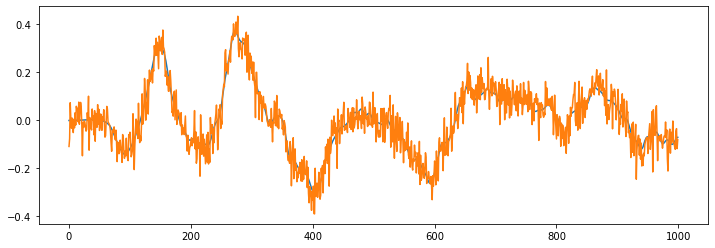

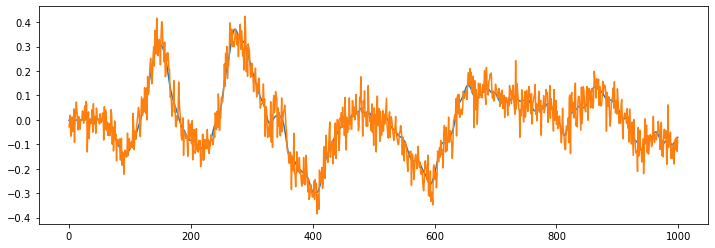

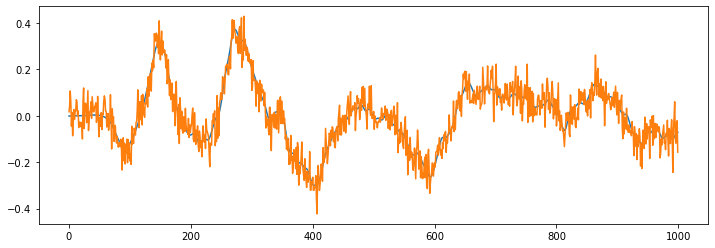

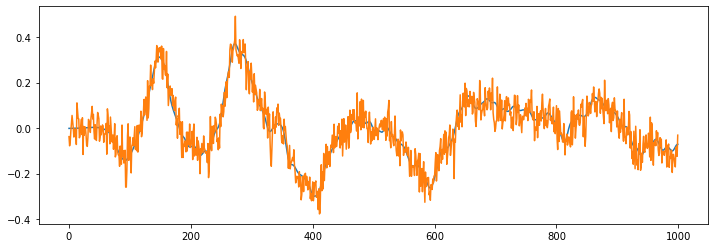

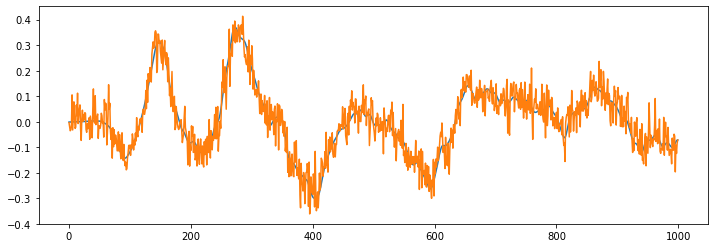

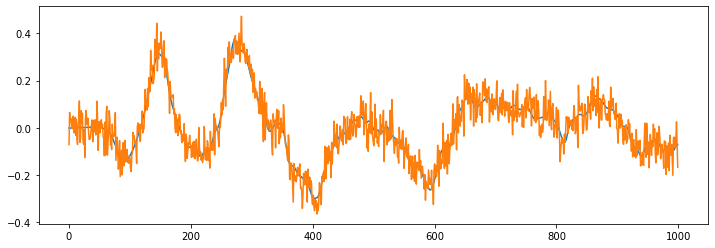

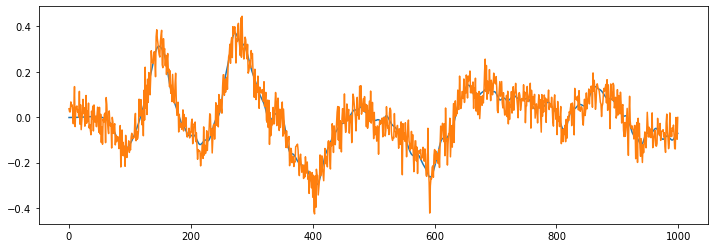

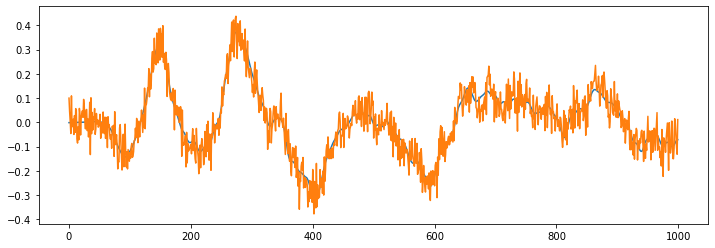

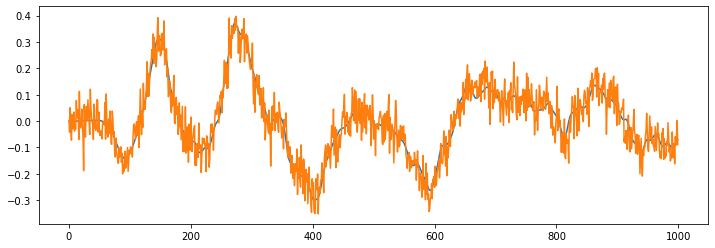

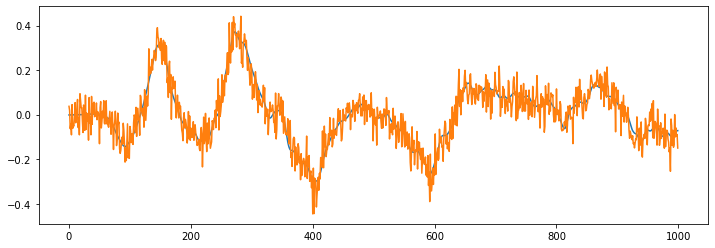

In [12]:

for i in range(10):
    samples = audio[:1000]
    augmented_samples = augment(samples=samples.numpy(), sample_rate=16000)

    plt.figure(figsize=(12, 4))
    plt.plot(samples)
    plt.plot(augmented_samples)